[dummy reg official doc](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)

# library

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import FinanceDataReader as fdr

import datetime as dt

import numpy as np

from tqdm import tqdm #진행바
from tqdm.notebook import tqdm


#시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
print("matplotlib version: {}". format(mpl.__version__))

import seaborn as sns
print("seaborn version: {}". format(sns.__version__))


#한글설정
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)
    
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
# "axes.unicode_minus" : 마이너스가 깨질 것을 방지

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')



import warnings
warnings.filterwarnings('ignore')

# GPU
import tensorflow as tf

#https://www.tensorflow.org/guide/gpu#allowing_gpu_memory_growth
#프로세스의 요구량만큼 메모리 사용 설정
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
    try:
        for i in range(len(gpus)):
            tf.config.experimental.set_memory_growth(gpus[i], True)
    except RuntimeError as e:
        # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
        print(e)
        
#지정해서 쓰고 싶으면 model 쓸 때는 with 구문 안에 넣기

matplotlib version: 3.4.2
seaborn version: 0.11.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [35]:
# 회귀 모델 만들기
# from sklearn.model_selection import ShuffleSplit
# from sklearn import metrics

# results = []

# def my_regressor_test(model_):
#     df_ = pd.read_csv('stock_2018_10days.csv')
#     # data split X, y
#     df_X = df_.iloc[:,2:-1]
#     df_y = df_[['Next_Change']]
    
#     ################################################### 전처리 파이프라인
#     from sklearn.pipeline import Pipeline
#     from sklearn.impute import SimpleImputer
#     from sklearn.preprocessing import MinMaxScaler

#     my_pipeline = Pipeline([('mean_imputer', SimpleImputer(strategy = 'mean')),
#                            ('mm_scaler', MinMaxScaler())])
#     ##############################################################################
    
#     ######################################################################### fitting
#     ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for train_idx, test_idx in tqdm(ss.split(df_X,df_y)):
#         x_train = df_.iloc[train_idx,2:-1]
#         y_train = df_.iloc[train_idx,-1]
#         x_test = df_.iloc[test_idx,2:-1]
#         y_test = df_.iloc[test_idx,-1]
        
#         y_train = np.array(y_train).reshape(-1, 1)
#         y_test = np.array(y_test).reshape(-1, 1)
        
#         # 전처리 (scaling)
#         x_train_fit = my_pipeline.fit(x_train)
#         x_train_pre = x_train_fit.transform(x_train)
#         x_test_pre = x_train_fit.transform(x_test)
        
#         y_train_fit = my_pipeline.fit(y_train)
#         y_train_pre = y_train_fit.transform(y_train)
#         y_test_pre = y_train_fit.transform(y_test)
#         ########################################################
        
#         _ = model_.fit(x_train_pre, y_train_pre)
#         y_pred_test = model_.predict(x_test_pre) # 예측

#         mse_score = metrics.mean_squared_error(y_test_pre, y_pred_test)

#         results.append([i, f'{str(model_)[:str(model_).index("(")]}', mse_score])
#     return results


results = []

def my_regressor():
    df_ = pd.read_csv('stock_2018_10days.csv')
    # data split X, y
    df_X = df_.iloc[:,2:-1]
    df_y = df_['Next_Change']#.iloc[:,-1]
    
    from sklearn.linear_model import LinearRegression # 일반 회귀 모델
    from sklearn.linear_model import Ridge, Lasso, ElasticNet # Norm 규제 회귀 모델
    from sklearn.linear_model import ARDRegression, BayesianRidge # 베이지안 회귀
    from sklearn.ensemble import RandomForestRegressor # decision tree 앙상블 모델, 배깅
    from xgboost import XGBRegressor # decision tree 앙상블 모델, 부스팅
#     from sklearn.model_selection import cross_val_score # model 검증
    
#     from sklearn.model_selection import StratifiedShuffleSplit
    from sklearn.model_selection import ShuffleSplit
    
    from sklearn.dummy import DummyRegressor
    from sklearn import metrics
    
    import ast # convert string to function
    import numpy as np
    
    ################################################### 전처리 파이프라인
    from sklearn.pipeline import Pipeline
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import MinMaxScaler

    my_pipeline = Pipeline([('mean_imputer', SimpleImputer(strategy = 'mean')),
                           ('mm_scaler', MinMaxScaler())])
    ##############################################################################

    
    linear = LinearRegression()
    ridge, lasso, elasticnet = Ridge(), Lasso(), ElasticNet()
    ardr_linear, baysian_ridge = ARDRegression(), BayesianRidge()
    random_forest = RandomForestRegressor()
    xgboost_linear = XGBRegressor()
    dummy = DummyRegressor(strategy = 'mean')
    
    my_model_list = ['linear', 'ridge', 'lasso', 'elasticnet',
                     'ardr_linear', 'baysian_ridge',
                     'random_forest', 'xgboost_linear', 'dummy']
    
    ######################################################################### fitting
    for model_nm in tqdm(my_model_list):
        
        # cv
        ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
        for train_idx, test_idx in tqdm(ss.split(df_X,df_y)):
            x_train = df_.iloc[train_idx,2:-1]
            y_train = df_.iloc[train_idx,-1]
            x_test = df_.iloc[test_idx,2:-1]
            y_test = df_.iloc[test_idx,-1]

            y_train = np.array(y_train).reshape(-1, 1)
            y_test = np.array(y_test).reshape(-1, 1)

            # 전처리 (scaling)
            x_train_fit = my_pipeline.fit(x_train)
            x_train_pre = x_train_fit.transform(x_train)
            x_test_pre = x_train_fit.transform(x_test)

            y_train_fit = my_pipeline.fit(y_train)
            y_train_pre = y_train_fit.transform(y_train)
            y_test_pre = y_train_fit.transform(y_test)
            ########################################################
        
            # fitting
            model_ = eval(model_nm).fit(x_train_pre, y_train_pre)
            y_pred_test = model_.predict(x_test_pre) # 예측

            mse_score = metrics.mean_squared_error(y_test_pre, y_pred_test)

            results.append([i, f'{model_nm}', mse_score]) #[:str(model).index("(")]
            i+=1
            #####################################################################################
    
    return results#score_dic#[0]

In [36]:
%%time
# # test
# from sklearn.linear_model import LinearRegression # 일반 회귀 모델
# linear = LinearRegression()
# my_regressor_test(linear)

_ = my_regressor()
results

  0%|          | 0/9 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

CPU times: user 46min 48s, sys: 1h 5min 54s, total: 1h 52min 42s
Wall time: 11min 50s


[[1, 'linear', 0.013767939672381671],
 [1, 'linear', 0.013282862263574028],
 [1, 'linear', 0.015694267581386038],
 [1, 'linear', 0.012663106091462513],
 [1, 'linear', 0.01993391299053145],
 [1, 'ridge', 0.009065373346015116],
 [1, 'ridge', 0.010358969722749599],
 [1, 'ridge', 0.010057654797502745],
 [1, 'ridge', 0.00852111864295493],
 [1, 'ridge', 0.007527980825662966],
 [1, 'lasso', 0.009031824658903703],
 [1, 'lasso', 0.009485004324329369],
 [1, 'lasso', 0.009299211006159235],
 [1, 'lasso', 0.007967362618079598],
 [1, 'lasso', 0.007380640387920638],
 [1, 'elasticnet', 0.009031824658903703],
 [1, 'elasticnet', 0.009485004324329369],
 [1, 'elasticnet', 0.009299211006159235],
 [1, 'elasticnet', 0.007967362618079598],
 [1, 'elasticnet', 0.007380640387920638],
 [1, 'ardr_linear', 0.009154059556662146],
 [1, 'ardr_linear', 0.01062892112101308],
 [1, 'ardr_linear', 0.010739074356123939],
 [1, 'ardr_linear', 0.008697960683390226],
 [1, 'ardr_linear', 0.007591710450454088],
 [1, 'baysian_ridg

In [37]:
# results = [[1, 'linear', 0.013767939672381671],
#  [2, 'linear', 0.013282862263574028],
#  [3, 'linear', 0.015694267581386038],
#  [4, 'linear', 0.012663106091462513],
#  [5, 'linear', 0.01993391299053145],
#  [1, 'ridge', 0.009065373346015116],
#  [2, 'ridge', 0.010358969722749599],
#  [3, 'ridge', 0.010057654797502745],
#  [4, 'ridge', 0.00852111864295493],
#  [5, 'ridge', 0.007527980825662966],
#  [1, 'lasso', 0.009031824658903703],
#  [2, 'lasso', 0.009485004324329369],
#  [3, 'lasso', 0.009299211006159235],
#  [4, 'lasso', 0.007967362618079598],
#  [5, 'lasso', 0.007380640387920638],
#  [1, 'elasticnet', 0.009031824658903703],
#  [2, 'elasticnet', 0.009485004324329369],
#  [3, 'elasticnet', 0.009299211006159235],
#  [4, 'elasticnet', 0.007967362618079598],
#  [5, 'elasticnet', 0.007380640387920638],
#  [1, 'ardr_linear', 0.009154059556662146],
#  [2, 'ardr_linear', 0.01062892112101308],
#  [3, 'ardr_linear', 0.010739074356123939],
#  [4, 'ardr_linear', 0.008697960683390226],
#  [5, 'ardr_linear', 0.007591710450454088],
#  [1, 'baysian_ridge', 0.009037650519393644],
#  [2, 'baysian_ridge', 0.009479126831035377],
#  [3, 'baysian_ridge', 0.009302325771106726],
#  [4, 'baysian_ridge', 0.007967629914036456],
#  [5, 'baysian_ridge', 0.007362561987384167],
#  [1, 'random_forest', 0.00938388400803705],
#  [2, 'random_forest', 0.00964403386588122],
#  [3, 'random_forest', 0.00951036472195199],
#  [4, 'random_forest', 0.008935043642014619],
#  [5, 'random_forest', 0.008378253256470727],
#  [1, 'xgboost_linear', 0.010458291355952748],
#  [2, 'xgboost_linear', 0.01118174338899054],
#  [3, 'xgboost_linear', 0.010515756200019074],
#  [4, 'xgboost_linear', 0.011156504816630204],
#  [5, 'xgboost_linear', 0.010007808906903452],
#  [1, 'dummy', 0.009031824658903703],
#  [2, 'dummy', 0.009485004324329369],
#  [3, 'dummy', 0.009299211006159235],
#  [4, 'dummy', 0.007967362618079598],
#  [5, 'dummy', 0.007380640387920638]]


In [74]:
dic = {}
for i in results:
    if i[1] not in dic: # dic.keys()라고 써도 됨.
        dic[i[1]] = [i[2]]
    else:
        dic[i[1]].append(i[2])


# import math
# 리스트에 mean 함수가 내장이 안돼있다니...

for i in dic.keys():
    dic[i] = sum(dic[i])/len(dic[i])


score_lst = sorted(dic.items(), key = lambda t : t[1]) #mse 작은 순으로 줄 세워짐.
score_lst
# dic.keys()

[('baysian_ridge', 0.008629859004591272),
 ('lasso', 0.00863280859907851),
 ('elasticnet', 0.00863280859907851),
 ('dummy', 0.00863280859907851),
 ('ridge', 0.00910621946697707),
 ('random_forest', 0.009170315898871122),
 ('ardr_linear', 0.009362345233528694),
 ('xgboost_linear', 0.010664020933699203),
 ('linear', 0.015068417719867139)]

In [75]:
score_dic = {}
for i in score_lst:
    score_dic[i[0]] = i[1]

In [76]:
df = pd.DataFrame(score_dic.items(), columns=['key', 'value'])
df

,key,value
0,baysian_ridge,0.008630
1,lasso,0.008633
2,elasticnet,0.008633
3,dummy,0.008633
4,ridge,0.009106
5,random_forest,0.009170
6,ardr_linear,0.009362
7,xgboost_linear,0.010664
8,linear,0.015068


In [109]:
df[df.key=='dummy']['value'].values
f'dummy\n: {dummy_mean[0]:.2f}'

array([0.00863281])

'dummy\n: 0.01'

# MSE plot

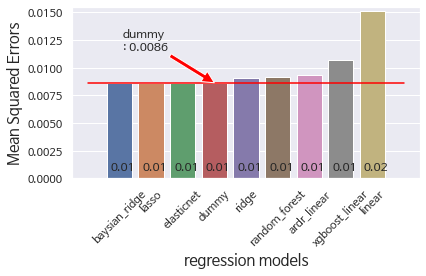

In [131]:
g = sns.barplot(x = 'key', y = 'value', data=df, capsize=.2)
_ = g.set_xticks(range(len(df)))
_ = g.set_xticklabels(g.get_xticklabels(), rotation=45)
_ = g.set_xlabel("regression models", fontsize = 15)
_ = g.set_ylabel("Mean Squared Errors", fontsize = 15)
_ = g.set_ylim([0, 0.0155]) # ax.set(ylim=(0.4, 0.6))
dummy_mean = df[df.key=='dummy']['value'].values
_ = g.plot([-1,len(df)], [dummy_mean, dummy_mean], color = 'red')
_ = g.annotate(text = f'dummy\n: {dummy_mean[0]:.4f}', xy = (3, dummy_mean), xytext = (0.1, 0.0115),
               arrowprops = dict(facecolor = 'red', shrink = 0),)


val = df['value']
cnt = 0
for i in range(len(df)):
    _ = g.text(cnt-0.27, 0.0007, f'{val[i]:.2f}')
    cnt += 1

plt.tight_layout()
# bar plot official doc
# https://seaborn.pydata.org/generated/seaborn.barplot.html
# .set_xticklabels rot
# https://data-newbie.tistory.com/261
# .set_label
# https://www.delftstack.com/ko/howto/seaborn/seaborn-lineplot/